# Machine Learning in Python - Group Project 2


Contributors:
* Thomas Lanning
* Alexander Bohane
* Mengyao Zhang
* Shangyun Sun

## General Setup

In [1]:
# Add any additional libraries or submodules below

# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np
import calendar

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn modules
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

In [3]:
# Load data
d = pd.read_csv("hotel.csv")

For the details about data set;

- please check the Project Description pdf file and related article from the Learn page. 

## 1. Introduction

*This section should include a brief introduction to the task and the data (assume this is a report you are delivering to a client).* 

- If you use any additional data sources, you should introduce them here and discuss why they were included.

- Briefly outline the approaches being used and the conclusions that you are able to draw.

Dear Client, 

In this report, we have analyzed the data provided about hotel cancellations to better understand what factors drive the cancellations of bookings. The main aim here is to provide an accurate model, but also keeping in mind what factors of a booking affect the probability of it being cancelled. 

To do this task, we will be using understandable and validated models that are both accurate and reliable. Since we also want to rank the importance of different factors, we will not be making any black box models. We want to be able to visualize our model to some extent for you, so you have a deeper understanding of what is going on and how we drew our conclusions. 

Before we start modelling, we will start with an extensive data analysis to see what data is missing, incorrect or nonsensical. We will visualize the data for you to understand patterns, correlations and other aspects.

After we understand the data better, we can develop a model to predict the cancellation rate. In this report we have chosen a "XXXXXXXXXXXfill this inXXXXXXXXXXXXXX" model. This is done because it is not a black box and produces excellent predictions. 

The model predicts that the most important features are _________________ and \__________________. This leads to the conclusion that _________

Further discussions will be found throughout the report, and our full discussion with conclusion at the end of this report. 

## 2. Exploratory Data Analysis and Feature Engineering

*Include a detailed discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling.* 

- Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up. 
- Think carefully about whether each plot needs to be included in your final draft - your report should include figures but they should be as focused and impactful as possible.

*Additionally, this section should also implement and describe any preprocessing / feature engineering of the data.*

- Specifically, this should be any code that you use to generate new columns in the data frame `d`. All of this processing is explicitly meant to occur before we split the data in to training and testing subsets. 
- Processing that will be performed as part of an sklearn pipeline can be mentioned here but should be implemented in the following section.*

**All code and figures should be accompanied by text that provides an overview / context to what is being done or presented.**

### 2.1 Exploratory Data Analysis

First we will explore the given dataset and clean the abnormal data.

#### 2.1.1 Data Overview

In [4]:
d.head(1)

,is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,Resort Hotel,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0


The information of the given data is shown as follows. 

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

As we can see from the above, there are 119390 bookings with 30 features. 

Besides, four features `children`, `country`, `agent`, and `company` have 'NULL'. However, the 'NULL' in `agent` and `company` should not be consideres as a missing value. It is more likely to represent 'not applicable'. For example, a booking with 'NULL' `agent` means that this booking is not from a travel agent. So we regard 'NULL' in `agent` and `company` as a new category.

It is worth noting that the data type of `agent` and `company` is float, but actually data recorded in `agent` and `company` are their IDs, which should be regarded as categorical variables.

Then we see the descriptive statistics of our data.

In [6]:
display(d.describe().T.round(2))

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.37,0.48,0.00,0.00,0.00,1.0,1.0
lead_time,119390.0,104.01,106.86,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119390.0,2016.16,0.71,2015.00,2016.00,2016.00,2017.0,2017.0
arrival_date_week_number,119390.0,27.17,13.61,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119390.0,15.80,8.78,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119390.0,0.93,1.00,0.00,0.00,1.00,2.0,19.0
stays_in_week_nights,119390.0,2.50,1.91,0.00,1.00,2.00,3.0,50.0
adults,119390.0,1.86,0.58,0.00,2.00,2.00,2.0,55.0
children,119386.0,0.10,0.40,0.00,0.00,0.00,0.0,10.0
babies,119390.0,0.01,0.10,0.00,0.00,0.00,0.0,10.0


We can find:
* The ranges of date (including `arrival_date_year`, `arrival_date_week_number` and `arrival_date_day_of_month`) are all reasonable.
* The minimum value of `adr`(Average Daily Rate) is negative (-6.38), which is impossible, so the bookings with negative `adr` should be cleaned from our data. 
* The minimum values of `adults` and `children` are 0. We should make sure that for each booking, the total number of `adults` and `children` is not 0. 

#### 2.1.2 Data Cleaning

Based on what we have found, we clean the data before making further analysis.

We create a new category for 'NULL' in `agent` and `company`.

In [7]:
d['agent'] = d['agent'].fillna(0)
d['company'] = d['company'].fillna(0)

We replace 'Undefined' with 'SC' in `meal` because we can find that they have the same meaning from the table 'Description of Vaviables'. 

In [8]:
d.loc[d['meal'] == 'Undefined', 'meal'] = 'SC'

We replace 'Undefined' in other features with NaN, since they don't have particular meanings and can be treated as missing values.

In [9]:
d.replace('Undefined', np.nan, inplace = True)

Now we want to see how many missing values we have in our data.

In [10]:
null = d.isnull().sum()
null[null.values != 0]

children                  4
country                 488
market_segment            2
distribution_channel      5
dtype: int64

The largest possible proportion of missing values in whole data is 499/119390, which is still pretty small. So we can directly delete those bookings with incomplete data.

In [11]:
d = d.dropna()
len(d)

118897

Then we clean the abnormal data. As we analysed before, negative `adr` should be eliminated.

In [12]:
d = d[d['adr'] >= 0]
len(d)

118896

The length of our data only decreases by 1, which indicates that there is only 1 false `adr` data. 

Then we consider the number of people (adults and children). If a booking has no adult and no child, we believe it is unseasonable and drop it from our data.

In [13]:
d.drop(d[d.adults + d.children == 0].index, inplace = True)
len(d)

118726

The number of bookings is still large. We can then make exploration on it.

We also consider whether our data have **duplicates**. Bookings in our data don't have unique identifiers like order numbers, so it is hard to tell whether there is a duplicate. Even if two bookings have the same values for all features, we can't directly regard them as one booking and its copy. Therefore, we don't delete any bookings for the reason of duplication.

Finally, we convert the data type of `agent` and `company` into 'object', in order to easily seperate the numerical and categorical features by their types.

In [14]:
d[['agent', 'company']] = d[['agent', 'company']].astype(int).astype(str)

#### 2.1.3 Numerical Features Analysis

Now we focus on the numerical features. 

In [15]:
num_data = d.select_dtypes(include = ['int', 'float'])
num_data.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

The correlation between these features is shown below.

<AxesSubplot:>

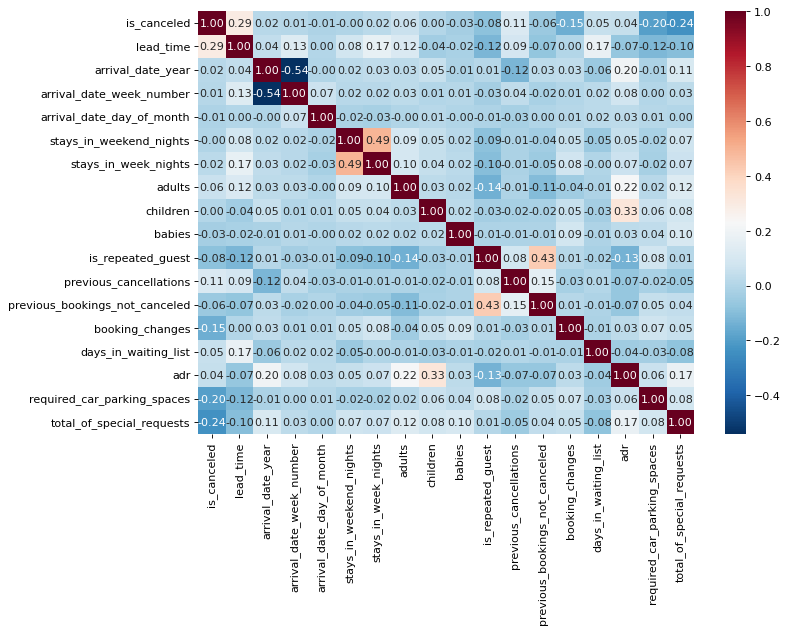

In [16]:
corr = num_data.corr()
sns.set_context({'figure.figsize': [10,7]})
sns.heatmap(corr,cmap = 'RdBu_r', annot = True, fmt = '.2f')

We can find:
* If we focus on the first line, we can see the correlation between `is_canceled` and other features. 
  * `lead_time` has the largest positive correlation (0.29) with `is_canceled`, which means that the earlier a booking is made, the more likely it is to be cancelled. 
  * `total_of_special_requests` has the largest negative correlation (-0.24). It indicates that the more special requests a booking has, the less likely it is to be cancelled.
  * `required_car_parking_spaces` and `booking_changes` have relatively large negative correlations with `is_canceled`. It seems that the bookings with specific requirements (like car parking spaces, further changes and other special requests) reflect the willingness of the customers to go to the hotel, rather than cancel their bookings.
* `arrival_date_year` and `arrival_date_week_number` have the highest correlation among all pairs. However, as the years of our data are too far away from the present, we consider that for the prediction of future cancellation, it is not meaningful to study `arrival_date_year` in the data.
* It is natural that `stay_in_week_nights` and `stay_in_weekend_nights` have relatively high correlation. 
* Customers who have previous bookings that are not cancelled are more likely to book repeatedly.

Since the purpose of the project is to understand why customers cancel their reservations, we then focus on the influence of features which have high correlation with `is_canceled`. For convenience, we define a function to calculate the cancellation rate of different values in one feature.

In [17]:
def cancel_by_group(d, feature_name):
    
    # all values in this feature
    name_list = d[feature_name].drop_duplicates().values
    total = []   # the total number of bookings
    cancel = []  # the number of cancelled bookings
    for name in name_list:
        total.append(len(d[d[feature_name] == name]))
        cancel.append(len(d[(d[feature_name] == name) & (d['is_canceled'] == 1)]))
    cancel_rate = [round(a / b, 2) for a, b in zip(cancel, total)]  # calculate the cancellation rate
    feature_cancel = pd.DataFrame({feature_name: name_list, 'total_booking': total, 
                               'cancellation_rate': cancel_rate})
    sort_value = feature_cancel.sort_values(by = ['total_booking'], ascending = False)
    return sort_value

**lead_time**

<AxesSubplot:xlabel='lead_time', ylabel='cancellation_rate'>

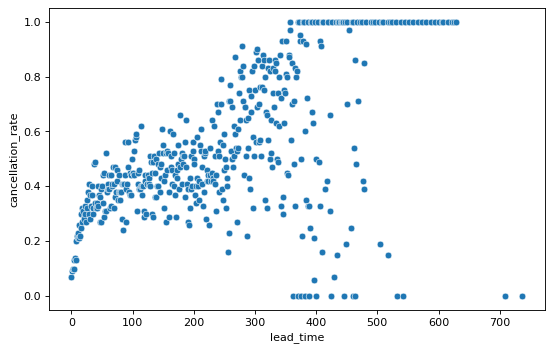

In [18]:
lt_c = cancel_by_group(num_data, 'lead_time').sort_values(by = ['lead_time'])
sns.set_context({'figure.figsize': [8,5]})
sns.scatterplot(x = 'lead_time', y = 'cancellation_rate', data = lt_c)
# label and title

The plot tells:
* When `lead_time` lies within around [0, 100], we can find a clear upward trend, which means that the cancellation rate rises as the number of days booked in advance increases.
* When `lead_time` lies within around [100, 200], there is no clear trend. By observation, we find that the cancellation rate fluctuates between approxiamtely 0.2 and 0.6. And as the value of lead_time exceeds 200, the fluctuation range increases with lead_time increasing.
* When the value of the `lead_time` exceeds 500, most of the cancellation rate is either 0 or 1, perhaps because the total number of bookings is too small, and these results are not generalized.

**total_of_special_requests**

<AxesSubplot:xlabel='total_of_special_requests', ylabel='cancellation_rate'>

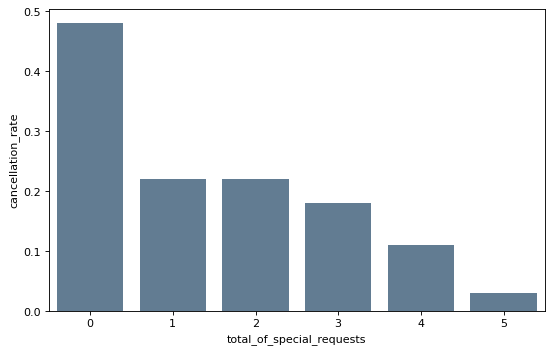

In [19]:
req_c = cancel_by_group(num_data, 'total_of_special_requests').sort_values(by = ['total_of_special_requests'])
sns.barplot(x = 'total_of_special_requests', y = 'cancellation_rate', data = req_c, color = sns.xkcd_rgb['steel blue'])

The plot tells that nearly a half of bookings without special requests will be cancelled later. If a booking has special requests, there will be an obvious drop in cancellation rate. Besides, if a booking has more than 3 special requests, the probability of cancellation will be even lower.

**required_car_parking_spaces**

In [20]:
cancel_by_group(num_data, 'required_car_parking_spaces').sort_values(by = ['required_car_parking_spaces'])

,required_car_parking_spaces,total_booking,cancellation_rate
0,0,111424,0.4
1,1,7269,0.0
2,2,28,0.0
4,3,3,0.0
3,8,2,0.0


It is amazing that the cancellation rate of bookings with requirement on car parking spaces is 0. It is a quite useful feature when we predict whether a booking will be cancelled, but the bookings with such requirement account for only a small percentage. Other features should be explored.

**booking_changes**

From the descriptive statistics of `booking_changes`, we know that it have a quite discrete distribution with several values. We want to select values with enough data (`total_booking` > 100) first, since the results drawn from few data are not general.

In [21]:
bc_c = cancel_by_group(num_data, 'booking_changes').sort_values(by = ['booking_changes'])
bc_c_d = bc_c[bc_c['total_booking'] > 100]
sum(bc_c_d['total_booking'])/sum(bc_c['total_booking'])

0.9988545053316039

The bookings with the specified number of changes account for 99.999% of all bookings. The further analysis based on them is tenable.

<AxesSubplot:xlabel='booking_changes', ylabel='cancellation_rate'>

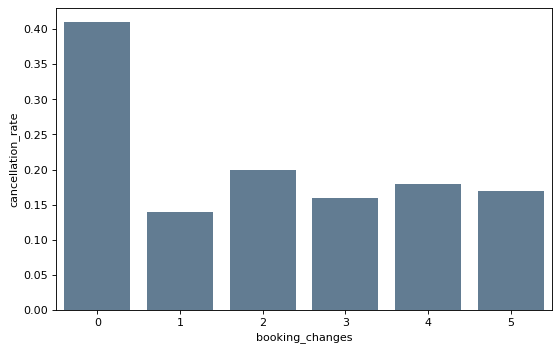

In [22]:
sns.barplot(x = 'booking_changes', y = 'cancellation_rate', data = bc_c_d, color = sns.xkcd_rgb['steel blue'])

There is a large gap in cancellation rate between bookings without any changes (around 40%) and bookings with changes (around 18%). As long as a customer change his booking, he is much less likely to cancel it.

From the analysis of `total_of_special_requests`, `required_car_parking_spaces` and `booking_changes`, we can conclude that if a customer has specific requirements on the booking, including special requests, car parking spaces and any further changes on the current booking, he has the strong willingness of going to the hotel. Therefore, there is a low risk of cancellation for such type of bookings.

#### 2.1.4 Categorical Features

We then focus on categorical features, which is important for feature engineering.

In [23]:
# extract columns of categorical features by dtype = object
cg_data = d.select_dtypes(include = ['object'])

# extract the names of all categorical features
cg_features = cg_data.columns

# add is_canceled to the data for convenience for further analysis
cg_data = pd.concat([cg_data, pd.DataFrame({'is_canceled': d['is_canceled']})], axis = 1)

In [24]:
cg_features

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'company', 'customer_type'],
      dtype='object')

We have 12 categorical features. We explore all of them, but in this section, only part of them are presented based on the amount of information they carry.

**Hotel Type**

There are two hotels in our data, which are City Hotel and Resort Hotel. The number of bookings and cancellation rate of each of them are shown in the following table.

In [25]:
cancel_by_group(cg_data, 'hotel')

,hotel,total_booking,cancellation_rate
1,City Hotel,79143,0.42
0,Resort Hotel,39583,0.28


We can find that City Hotel has more bookings, roughly twice as many as Resort Hotel. Besides, there is a significant difference in cancellation rate. City Hotel has a much higher cancellation rate (42%) than Resort Hotel (28%).

Due to the obvious difference between these two hotels, we want to investigate other features based on the type of hotel. For numerical features, we can roughly see their means and try to find the characteristics of each hotel. 

In [26]:
data_hotel = d.groupby('hotel').mean()
data_hotel.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month'], axis = 1, inplace = True)
display(data_hotel.T.round(4))

hotel,City Hotel,Resort Hotel
is_canceled,0.4177,0.2798
lead_time,109.8775,93.4499
stays_in_weekend_nights,0.7942,1.1962
stays_in_week_nights,2.1807,3.1411
adults,1.8548,1.8735
children,0.0916,0.1299
babies,0.0050,0.0140
is_repeated_guest,0.0250,0.0448
previous_cancellations,0.0798,0.1019
previous_bookings_not_canceled,0.1324,0.1301


From the table, we can find:
* For City Hotel, the average number of days booked in advance (110 days) is longer than that for Resort Hotel (93 days). It seems that customers of City Hotel are likely to make reservations more days in advance. Consider the larger number of total bookings in City Hotel, we speculate that City Hotel is busier and more popular, so that customers book far in advance, in case the rooms are full. 
* On average, customers of Resort Hotel stay longer, either in week nights or in weekend nights. Besides, the guests of Resort Hotel contains more children and babies. It can be easily explained by people's habits on holiday (longer stay in one hotel and travelling with whole family).
* Bookings of Resort Hotel have more specific requirements, including changing the current bookings, asking for car parking spaces, and having special requests. It is consisitent with our analysis before that such type of bookings reflects the strong willingness of guests to go to the hotel so that Resort Hotel has a lower cancellation rate.
* Bookings of City Hotel have longer time staying in the waiting list. It might be because the hotel is nearly full and the staff are waiting for cancellation before confirming the bookings. Considering the relatively high cancellation rate in City Hotel (42%), such waiting is reasonable.
* The Average Daily Rate of City Hotel is higher than that of Resort Hotel. There are many possible reasons, such as the higher demand for City Hotel. 

Then we continue to explore categorical features. If meaningful, we will analyze based on the type of hotels. For convenience, we define a function to calculate the total number of bookings and cancellation rate for each hotel on one feature.

In [27]:
def hotel_cancel(d, feature_name):
    
    # apply the function cancel_by_group to resort hotel data
    resort = cancel_by_group(d[d['hotel'] == 'Resort Hotel'], feature_name).sort_values(by = [feature_name])
    # apply the function cancel_by_group to city hotel data
    city = cancel_by_group(d[d['hotel'] == 'City Hotel'], feature_name).sort_values(by = [feature_name])
    hotel_type = ['']
    # add one column 'hotel_type', which makes it easier to plot
    resort_cancel = pd.DataFrame({feature_name: resort[feature_name], 
                                  'total_booking': resort['total_booking'],
                                  'cancellation_rate': resort['cancellation_rate'],
                                  'hotel_type': 'Resort hotel'})
    city_cancel = pd.DataFrame({feature_name: city[feature_name], 
                                'total_booking': city['total_booking'],
                                'cancellation_rate': city['cancellation_rate'],
                                'hotel_type': 'City hotel'})
    cancel = pd.concat([resort_cancel, city_cancel], ignore_index=True)
    return cancel

**Month of Arrival Date**

In [28]:
# create a list of ordered month name from January to December
month_num_list = list(range(1, 13))
month_name_list = [calendar.month_name[i] for i in month_num_list]

<AxesSubplot:xlabel='arrival_date_month', ylabel='cancellation_rate'>

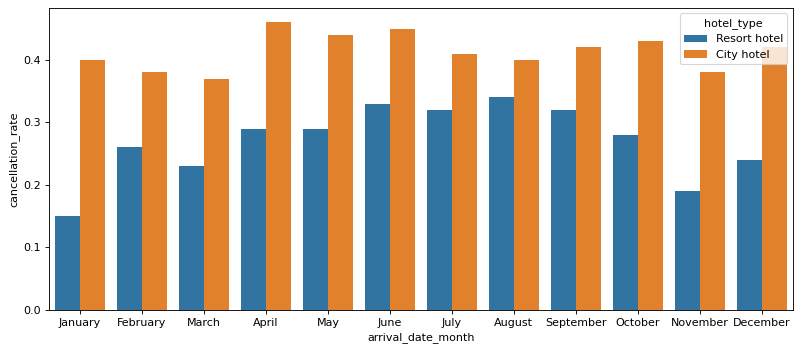

In [29]:
hotel_month = hotel_cancel(cg_data, 'arrival_date_month')
sns.set_context({'figure.figsize': [12,5]})
sns.barplot(x = 'arrival_date_month', y = "cancellation_rate" , hue="hotel_type", data = hotel_month, order = month_name_list)

City Hotel has higher cancellation rates than Resort Hotel throughout the year, and there is no clear trend in monthly cancellation rates. On the other hand, Resort Hotel has a higher cancellation rate in June, July, August and September, compared to the beginning and end of the year.

**Meal Type**

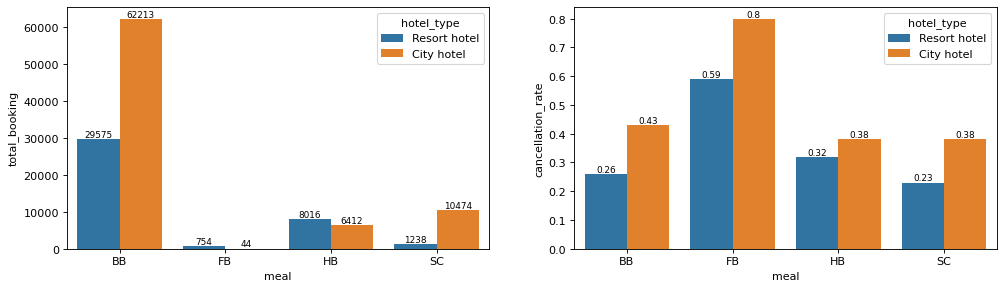

In [30]:
hotel_meal = hotel_cancel(cg_data, 'meal')
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 2, 1)
ax1 = sns.barplot(x = 'meal', y = 'total_booking' , hue = 'hotel_type', data = hotel_meal)
for i in ax1.containers:
    ax1.bar_label(i, fontsize = 8)
fig.add_subplot(1, 2, 2)
ax2 = sns.barplot(x = 'meal', y = 'cancellation_rate' , hue='hotel_type', data = hotel_meal)
for i in ax2.containers:
    ax2.bar_label(i, fontsize = 8)

The graph shows:
* In all `meal` categories, the cancellation rate for City Hotel is higher than that for Resort Hotel. 
* The highest cancellation rates for both type of hotels are found in the Full board (FB) category. However, we can see that the total number of bookings in the Full board (FB) category is very low and thus this result is not considered to be generalised. 
* Except for the Full board (FB) category, bookings with Bed & Breakfast (BB) is the most likely to cancel for City Hotel. For Resort Hotel, it is Half board (HB) that is most likely to have high cancellation rates.

**Country of Origin**

As for the nationality of guests, we prefer to treat the two hotels as a whole, that is, not to discuss the two hotels separately. In fact, even when analyzed separately, the nationality distribution of their guests is similar.

In [31]:
country_c = cancel_by_group(cg_data, 'country')
display(country_c.describe().round(4))

,total_booking,cancellation_rate
count,177.0000,177.0000
mean,670.7684,0.3029
std,3922.8794,0.2987
min,1.0000,0.0000
25%,2.0000,0.0000
50%,12.0000,0.2500
75%,74.0000,0.4600
max,48478.0000,1.0000


From the above table, we find that at least 75% of countries have only limited bookings (less than 100). Countries with few bookings will be ignored in later analysis because:
1. With too few data, we can't get a general result for guests with nationality of this country.
2. When running a hotel, we want to focus on main customer groups. Paying much attention to the minority doesn't cost effective.

Meanwhile, we don't want to exclude too many bookings, so the threshold of the least total bookings of one country needs setting carefully. Here, we choose countries with total bookings > 1000 and get 15 countries (see the graph below).

In [32]:
country_c_d = country_c[country_c['total_booking'] > 1000]
print(round(sum(country_c_d['total_booking'])/sum(country_c['total_booking'])*100,2),'%')

90.99 %


These 15 countries account for more than 90% of total bookings.

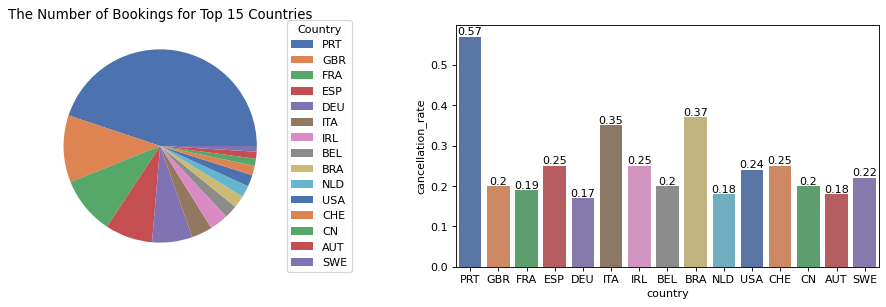

In [33]:
sns.set_context({'figure.figsize': [10,5]})
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 2, 1)
colors = sns.color_palette('deep')
wedges, text = plt.pie(country_c_d['total_booking'], colors = colors)
plt.legend(wedges, country_c_d['country'], title = 'Country', loc = 'center left', bbox_to_anchor = (1, 0, 0.5, 1))
plt.title('The Number of Bookings for Top 15 Countries')
fig.add_subplot(1, 2, 2)
ax = sns.barplot(x = 'country', y = 'cancellation_rate', data = country_c_d, palette = colors)
for i in ax.containers:
    ax.bar_label(i)

The graph shows that
* Portugal (PRT) is the country with the most guests and the highest cancellation rate (57%). We can reasonably speculate that these two hotels are in Portugal, so there are more guests from this country. Moreover, due to the shorter distance or more convenient transportation, it is less costly for Portuguese to change their travel, so the proportion of booking cancellations is higher.
* Italy (ITA) and Brazil (BRA) have relatively high cancellation rate (35% and 37% respectively),and other countries in the top 15 except for Portugal have cancellation rates around 20%.

**Distribution Channel**

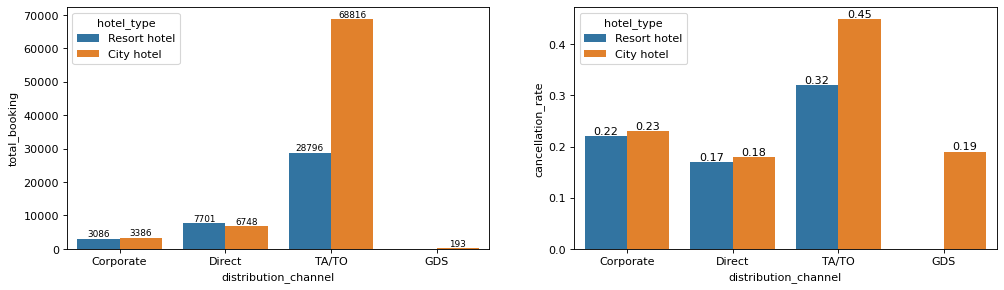

In [34]:
hotel_channel = hotel_cancel(cg_data, 'distribution_channel')
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 2, 1)
ax1 = sns.barplot(x = 'distribution_channel', y = 'total_booking' , hue = 'hotel_type', data = hotel_channel)
for i in ax1.containers:
    ax1.bar_label(i, fontsize = 8)
fig.add_subplot(1, 2, 2)
ax2 = sns.barplot(x = 'distribution_channel', y = 'cancellation_rate' , hue = 'hotel_type', data = hotel_channel)
for i in ax2.containers:
    ax2.bar_label(i)

We observe that
* For total bookings, the majority of customers make their bookings through Travel Agents (TA) and Tour Operators (TO). In addition, the Resort Hotel does not have orders booked through GDS, perhaps because the hotel does not have a GDS booking channel. Although the City Hotel did have GDS bookings, the total number of bookings was so small that the availability of the GDS channel did not have a significant impact on the total number of hotel bookings.
* For cancellation rate, in all the `distribution_channels` categories, City Hotel has higher cancellation rates than Resort Hotel. Besides, bookings through Travel Agents and Tour Operators (TA/TO) have the highest cancellation rates for both hotels.

**Room Type**

There are two features about room type, `reserved_room_type` and `assigned_room_type`. We will first explore the relationship between the reserved room types and cancellation rates, and then consider whether assigning the same type of rooms as reservation has a significant influence on the cancellation rate.

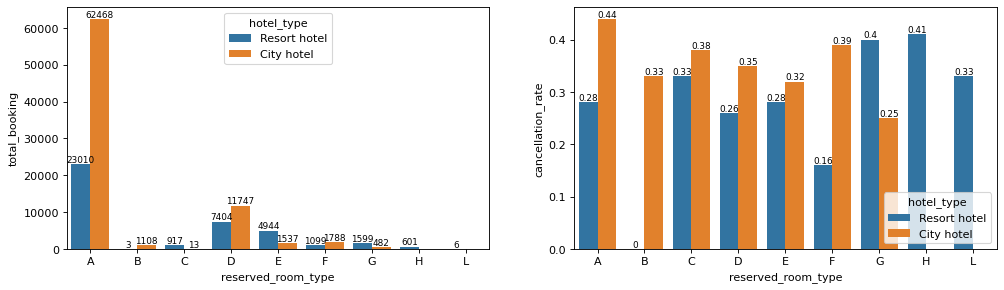

In [35]:
hotel_rm = hotel_cancel(cg_data, 'reserved_room_type')
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 2, 1)
ax1 = sns.barplot(x = 'reserved_room_type', y = 'total_booking' , hue = 'hotel_type', data = hotel_rm)
for i in ax1.containers:
    ax1.bar_label(i, fontsize = 8)
fig.add_subplot(1, 2, 2)
ax2 = sns.barplot(x = 'reserved_room_type', y = 'cancellation_rate' , hue = 'hotel_type', data = hotel_rm)
ax2.legend(loc = 'lower right', title = 'hotel_type')
for i in ax2.containers:
    ax2.bar_label(i, fontsize = 8)

From the graph, we can tell:
* The room type reserved by most guests of both Resort Hotel and City Hotel is Type A. Many types only have few bookings such as type B in Resort Hotel and Type C in City Hotel. Besides, we speculate that the room types of the two hotels are not the same, since there is no bookings of type H and L in City Hotel.
* Due to the small number of bookings in many types of rooms, the detailed analysis of cancellation rate for each type in each hotel is lack of need. If we see the cancellation rates for type A (28% in Resort Hotel and 44% in City Hotel), we can find that they are close to the cancellation rate for the whole hotel (28% and 42% respectively). 

Now we want to find whether assigning the same type of rooms as reservation has any influence on the cancellation rate. We add a new column `same_room_type` into our data, which represents whether the assigned room type is same as the reserved room type.

In [36]:
cg_data['same_room_type'] = cg_data['reserved_room_type'] == cg_data['assigned_room_type']

In [37]:
hotel_cancel(cg_data, 'same_room_type')

,same_room_type,total_booking,cancellation_rate,hotel_type
0,False,7499,0.05,Resort hotel
1,True,32084,0.33,Resort hotel
2,False,7078,0.06,City hotel
3,True,72065,0.45,City hotel


From the result, we can see that for both hotels, assigning different type of rooms will result in a much lower cancellation rate. Recalling our own experience in hotels, if the hotels change our reserved room type, it is common that they upgrade the room for us. At the same price, everyone will be willing to enjoy better rooms. This may be the reason behind the low cancellation rate.

**Deposit Type**

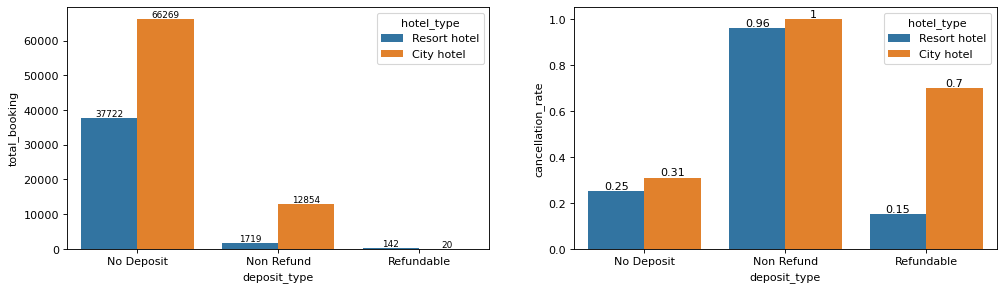

In [38]:
hotel_deposit = hotel_cancel(cg_data, 'deposit_type')
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 2, 1)
ax1 = sns.barplot(x = 'deposit_type', y = 'total_booking' , hue = 'hotel_type', data = hotel_deposit)
for i in ax1.containers:
    ax1.bar_label(i, fontsize = 8)
fig.add_subplot(1, 2, 2)
ax2 = sns.barplot(x = 'deposit_type', y = 'cancellation_rate' , hue = 'hotel_type', data = hotel_deposit)
for i in ax2.containers:
    ax2.bar_label(i)

From the graph, we can see that City Hotel has a high cancellation rate (70%) in refundable bookings, but as the total number of such bookings is so small (only 20 bookings) that we don't have to worry about it.

A more serious thing is that the cancellation rate for non-refundable bookings is the highest. Resort Hotel has 96% cancellation rate in 1719 non-refundable bookings and City Hotel has nearly 100% cancellation rate in more than 12000 non-refundable bookings, which is counter-intuitive. We next want to explain it using our data.

In [39]:
data_deposit = d.groupby('deposit_type').mean()
data_deposit.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month'], axis = 1, inplace = True)
display(data_deposit.T.round(4))

deposit_type,No Deposit,Non Refund,Refundable
is_canceled,0.2849,0.9936,0.2222
lead_time,89.1175,212.9280,152.0988
stays_in_weekend_nights,0.9711,0.6223,0.9753
stays_in_week_nights,2.5579,2.0902,2.8519
adults,1.8680,1.8112,1.9074
children,0.1190,0.0006,0.0309
babies,0.0091,0.0000,0.0000
is_repeated_guest,0.0354,0.0044,0.0247
previous_cancellations,0.0418,0.4119,0.0000
previous_bookings_not_canceled,0.1487,0.0106,0.0185


Calculating all mean values of the data grouped by deposit type, we can see:
* On average, non-refundable bookings have a longer `lead_time`, but a shorter length of stay.
* Non-refundable bookings have a lower average number of children and babies.
* Non-refundable bookings have a low average rate of repeated guests (0.44%), but once they are repeated guests, the average number of cancellations of their previous orders is high.
* Non-refundable bookings tend to have fewer special needs and demand for car parking spaces. And the average number of changes made to an order after it has been entered on the PMS is only 0.012, which is very low.

Based on the above findings, we guess that these non-refundable bookings are made for business trips. And the nature of business trips result in a high cancellation rate. In more detail, for a business trip, all preparations will be done far in advance, and in consideration of saving money, non-refundable reservation which is very likely to be cheaper will be chosen. But at the same time, it is also subject to changes of circumstances, which will lead to cancellation. Next we want to see whether this guess is tenable.

In [40]:
nonrefund = cg_data[cg_data['deposit_type'] == 'Non Refund']
len(nonrefund)

14573

In [41]:
nonrefund[nonrefund['company'] != '0'].shape

(506, 14)

It shows that only a small percentage (506/14573) of non-returnable orders are made by companies, so it cannot verify our guess and this nearly to 1 cancellation rate for non-refundable bookings is still strange. We consider to exclude `deposit_type` from our model.

**Agent and Company**

For `agent` and `company`, we deal with them similar to what we have done for `country`. There are too many agencies and companies in our data and we are only interested in those with large number of total bookings.

Firstly, we focus on `agent`.

In [42]:
hotel_agent = hotel_cancel(cg_data, 'agent')
hotel_agent.describe()

,total_booking,cancellation_rate
count,409.000000,409.000000
mean,290.283619,0.241809
std,1863.786785,0.312919
min,1.000000,0.000000
25%,2.000000,0.000000
50%,19.000000,0.100000
75%,76.000000,0.390000
max,31915.000000,1.000000


We can see from the above table that more than 75% of agencies only have less than 100 bookings. We set a threshold at 500.

In [43]:
hotel_agent_d = hotel_agent[hotel_agent['total_booking'] > 500]
print('There are', len(hotel_agent_d['agent'].drop_duplicates()), 'agencies that have more than 500 bookings in one hotel,')
print('and they take up of', round(sum(hotel_agent_d['total_booking'])/sum(hotel_agent['total_booking'])*100, 2),'%',
      'bookings in all bookings of these two hotels.')

There are 26 agencies that have more than 500 bookings in one hotel,
and they take up of 83.2 % bookings in all bookings of these two hotels.


Then we only look at these 26 agencies. Notice that 0 means that the bookings are not made by agents.

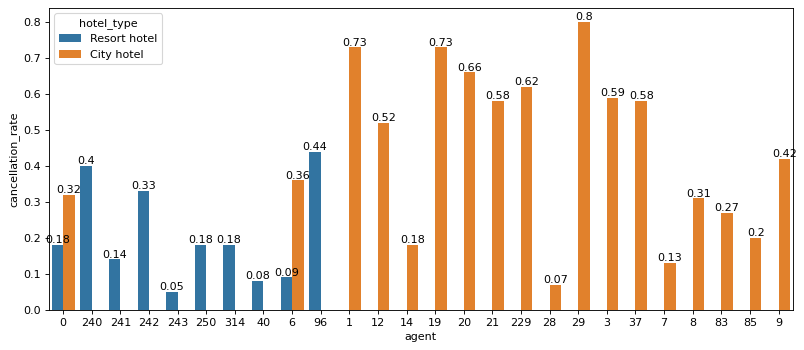

In [44]:
sns.set_context({'figure.figsize': [12,5]})
ax = sns.barplot(x = 'agent', y = 'cancellation_rate' , hue='hotel_type', data = hotel_agent_d)
for i in ax.containers:
    ax.bar_label(i)

The graph tells:
* Most agencies have their preference between the two hotels when making reservations. Or we can say that most agencies make reservations mostly in only one of the two hotels. It can be regarded as the partnerships between agencies and hotels.
* There are 17 agencies having more than 500 bookings in City Hotel and 9 agencies in Resort Hotel, from which we can also infer that City Hotel has larger number of bookings than Resort Hotel.

Similarly, we look at `company`.

In [45]:
hotel_cancel(cg_data, 'company').sort_values(by = ['total_booking'], ascending = False).head(6)

,company,total_booking,cancellation_rate,hotel_type
233,0,75477,0.43,City hotel
0,0,36645,0.29,Resort hotel
371,40,921,0.08,City hotel
43,223,784,0.15,Resort hotel
422,67,267,0.66,City hotel
397,45,249,0.11,City hotel


Most bookings (112122/118726) are not made by companies. For modeling, we can take company 40 and company 223 into consideration, since they are the only two that have relatively large total bookings and significantly low cancellation rate compared to those bookings not made by companies.

### 2.2 Feature Engineering

#### 2.2.1 Features Added
Just as we analysed before, we will add one feature `same_room_type`, where 1 represents that the assigned room type is same as the reserved room type and 0 represents different room types between reservation and assignment.

In [46]:
d['same_room_type'] = (cg_data['reserved_room_type'] == cg_data['assigned_room_type']).astype(int)

#### 2.2.2 Features Eliminated
* We will eliminate `assigned_room_type`, since it can be effectively represented by our new feature `same_room_type`.
* We will eliminate `deposit_type` because of the possible wrong data based on our analysis before.
* We will eliminate `arrival_date_week_number` and `arrival_date_year` because:
  1. The week of the arrival date can be fully represented by the month and the day of the arrival date. The latter two are more intuitive and already contained in our data.
  2. The years of our data are too far away from the present. What we want to do is the prediction of future cancellation, so it is not meaningful to contain the year of the arrival date in our model.

In [47]:
d = d.drop(columns = ['assigned_room_type', 'deposit_type', 'arrival_date_week_number', 'arrival_date_year'])

#### 2.2.3 Features Encoded

For `arrrival_date_month`, we use 1-12 to replace January to December.

In [48]:
d.replace(month_name_list, month_num_list, inplace = True)

For `country`, `agent`, and `company`, we only take categories with large number of bookings into consideration. In more details, we pick up countries with more than 1000 bookings, agents with more than 500 bookings and companies with more than 500 bookings.

In [49]:
country_list = country_c_d['country'].values

# perform encoding on the country column
encoded = pd.get_dummies(d['country'].apply(lambda x: x if x in country_list else 'Other_country'))

# merge the encoded dataframe with the original dataframe
d = pd.concat([d, encoded], axis = 1)

# drop the original country column and the Other_country since it is indirectly encoded in the other columns
d.drop(['country', 'Other_country'], axis = 1, inplace = True)

In [50]:
agent_list = hotel_agent_d['agent'].drop_duplicates().values
encoded = pd.get_dummies(d['agent'].apply(lambda x: x if x in agent_list else 'Other_agent'))
d = pd.concat([d, encoded], axis = 1)
d.drop(['agent', 'Other_agent'], axis = 1, inplace = True)

In [51]:
company_list = ['0', '40', '223']
encoded = pd.get_dummies(d['company'].apply(lambda x: x if x in company_list else 'Other_company'))

# rename the company ID, in order to tell them apart from agent ID
encoded = encoded.rename(columns={'0': '0(company)', '40': '40(company)', '223': '223(company)'})

d = pd.concat([d, encoded], axis = 1)
d.drop(['company', 'Other_company'], axis = 1, inplace = True)

The data after encoding these three features is shown as follows.

In [52]:
d.iloc[0:1, -40:]

,CN,DEU,ESP,FRA,GBR,IRL,ITA,NLD,PRT,SWE,...,6,7,8,83,85,9,96,0(company),223(company),40(company)
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Remember that we have 12 categorical features. After deleting 2 and encoding the above 4, there are still 6 features. They all have limited (less than 10) catogories, so we directly use OneHotEncode.

In [53]:
onehot_feature = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'customer_type']

# get column index of onehot_features in our data
onehot_column = []
for feature in onehot_feature:
    onehot_column.append(d.columns.get_loc(feature))
    
# get column index of other features
all_column = list(range(0, d.shape[1]))
others_column = list(set(all_column) - set(onehot_column))

In [54]:
ONE = OneHotEncoder(drop = 'first')

encoder = ColumnTransformer([
    ('others', 'passthrough', others_column),
    ('onehot', ONE, onehot_column),
])

d = encoder.fit_transform(d)

In [55]:
# get features' names after encoded
column_names = encoder.get_feature_names_out()
for i in range(len(column_names)):
    column_names[i] = column_names[i][8:]

In [56]:
# the data used to build the model
d = pd.DataFrame(d, columns = column_names)
d.shape

(118726, 86)

In [57]:
#d.to_csv('final_data.csv')

## 3. Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model.*

- You are strongly encouraged to explore many different modeling methods (e.g. logistic regression, classification trees, SVC, etc.) but you should not include a detailed narrative of all of these attempts. 
- At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validatin it.

*For example if you considered a logistic regression model, a classification tree, and a SVC model and ultimately settled on the logistic regression approach then you should mention that other two approaches were tried but do not include any of the code or any in depth discussion of these models beyond why they were rejected. This section should then detail is the development of the logistic regression model in terms of features used, interactions considered, and any additional tuning and validation which ultimately led to your final model.* 

**This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.**

Firstly, we split our data into testing and training. We want to determine the best model, but cannot use the testing dataset for this since it is "unseen" data. In addition we need to scale our data, since our final model (as mentioned previously) is a Logistic Regression classifier. 

Models we have also tried but will not continue with:
* LogisticRegression Classifier:
* Decision Tree Classifier
* K nearest neighbours
* SVM classifier 

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif

# Load your dataset
data = d.drop(['arrival_date_day_of_month'], axis=1)
"""REMOVE THIS LATER"""

# Split the dataset into features (X) and target (y)
X = data.drop('is_canceled', axis=1)
y = data['is_canceled']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Create a preprocessor for scaling and normalizing data
scalar = StandardScaler()

# Preprocess the training data
X_train_preprocessed = scalar.fit_transform(X_train)
X_test_preprocessed = scalar.transform(X_test)


Logistic Regression (C=10) Performance Metrics:
  Specificity: 0.89
  Recall: 0.72
  F1 score: 0.75
  Precision: 0.79
  ROC AUC: 0.90

Decision Tree Performance Metrics:
  Specificity: 0.86
  Recall: 0.78
  F1 score: 0.77
  Precision: 0.77
  ROC AUC: 0.82

NN Performance Metrics:
  Specificity: 0.86
  Recall: 0.76
  F1 score: 0.76
  Precision: 0.76
  ROC AUC: 0.89

SVC Performance Metrics:
  Specificity: 0.89
  Recall: 0.73
  F1 score: 0.76
  Precision: 0.79
  ROC AUC: 0.90



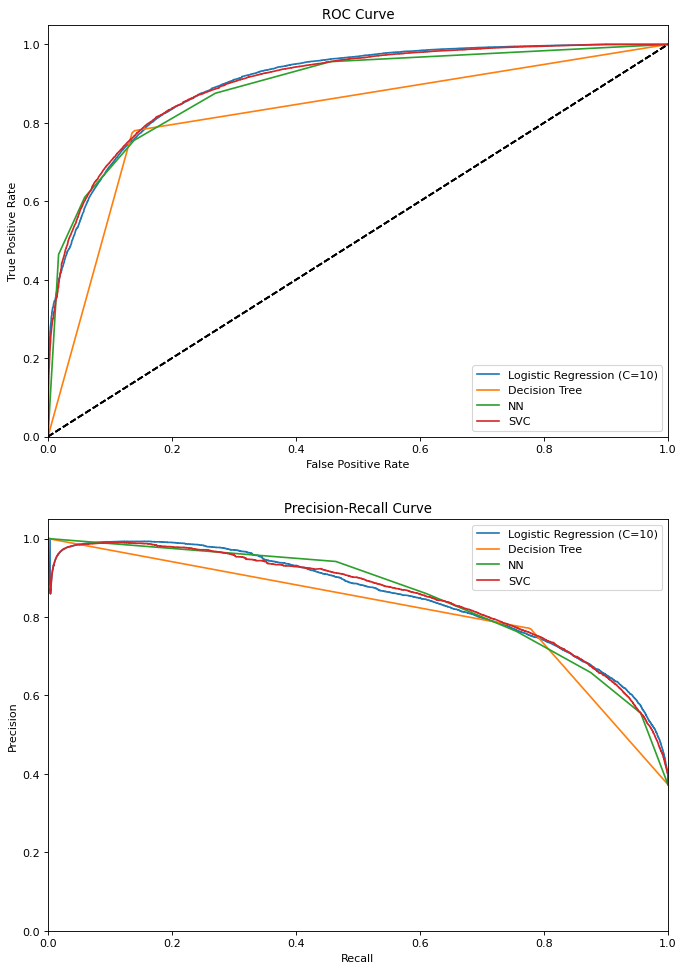

In [59]:
# Define three different classification models with different hyperparameters
#We only want glass box models - random forest is hence not suitable
models = [
    ('Logistic Regression (C=10)', LogisticRegression(solver = 'liblinear',C=10)),
    ('Decision Tree', DecisionTreeClassifier()), 
    ('NN', KNeighborsClassifier() ),
    ('SVC', SVC(kernel='linear', probability=True))
]

fig, [ax1,ax2] = plt.subplots(2,1, figsize=[10,15])

for name, model in models:
    # Fit the model
    model.fit(X_train_preprocessed, y_train)

    # Predict probabilities for the test set
    y_pred_proba = model.predict_proba(X_test_preprocessed)[:, 1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    ax1.plot(fpr, tpr, label=name)
    ax1.plot([0, 1], [0, 1], 'k--')
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('ROC Curve')
    ax1.legend(loc="lower right")

    # Calculate precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

    # Plot precision-recall curve
    ax2.plot(recall, precision, label=name)
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('Precision-Recall Curve')


    # Calculate performance metrics
    y_pred = model.predict(X_test_preprocessed)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
        #add accuracy of model???
    accuracy = (tp+tn)/(tp+tn+fn+fp)

    print(f'{name} Performance Metrics:')
    print(f'  Specificity: {specificity:.2f}')
    print(f'  Recall: {recall:.2f}')
    print(f'  F1 score: {f1:.2f}')
    print(f'  Precision: {precision:.2f}')
    print(f'  ROC AUC: {roc_auc:.2f}\n')
    #add accuracy of model???
    print(f'  Total accuracy: {accuracy:.2f}')
    
plt.legend()
plt.show()


It is important to define what the components of the confusion matrix are in the context of our hotel classification problem. In this project the target variable `is_canceled` is either 1 if a customer cancels their booking or 0 if they do not cancel their hotel booking. There are four possible outcomes for our classification model:
* True Positive (TP): The booking is canceled (1) and the model also predicts that the booking will be canceled (1)
* True Negative (TN): The booking is NOT canceled (0) and the model correctly predicts that the booking will NOT be canceled (0)
* False Positive (FP): The booking is NOT canceled (0) but the model wrongly predicts that the booking will be canceled (1)
* False Negative (FN): The booking is canceled (1) but the model wrongly predicts that the booking will NOT be canceled (0)

The metrics we will use to evaluate our models are defined as follows:

* Accuracy - Total accuracy of the model. How many identifications or classifications are correct as a percentage of the total number of samples. This is the sum of TP and TN over the total. 

* Specificity : The total coverage of true negatives. It is defined as the model estimate of true negatives (TN) over the total true number of negatives (TN + FP)

* Recall: Also known as the true positive rate. It is defined as the number of true positive (TP) estimates over the total number of true positive samples (TP+FN). 

* FPR: The false positive rate is defined as the total number of false positives (FP) over the total number of true negatives in the dataset (FP+TN)

* Precision: The accuracy of the true positive predictions. It is defined as the true positive estimates TP divided by the sum of the false positives (FP) and the true positives (TP)

* ROC AUC: Quantifies the performance of the classifier by calculating the area under the ROC curve. An AUC of 1 indicates a prefect model and an AUC of 0.5 indicates a random model. 

In the context of our hotel cancellation problem, it is crucial to interpret these different statistics and assess their relative importance to the task at hand as this will help determine how we fine tune our hyperparamers and how we will balance our threshold value. In the following cells of code, we will assess what the optimum thershold value for our model should be. 

The threshold value ranges from 0 to 1 and impacts the balance between the False Positive Rate (FPR) and True Positive Rate (TPR).

Let us now put in some thought into the real world impact of varying the threshold. 

FALSE POSITIVE:
An FP result indicates that the model predicts a particular booking will be canceled when in reality it will not be canceled. The impact on the hotel is that this will lead to overbooking, which may become problematic if the hotel reaches full capacity for a night and has to turn away guests. Economically this can lead to (1) loss through extra compensation for the guests turned away which may even exceed the cost of the room (2) Loss of reputation which in turn may lead to loss of sales in the future. 

FALSE NEGATIVE:
An FN results indicates that the model predicts that a booking will be NOT be canceled when in reality it will indeed be canceled. For the hotel, a high FN rate can be devastating as it may lead to many empty rooms on any given night. This implies losses for the hotel in terms of the revenue lost from having empty rooms and not reaching full capacity. The economic loss also depends on whether a deposit was paid and the value of that deposit 

So would we rather have more false negatives or false positives?

The answer to this is difficult to quantify; without additional data such as the the cost of one room, the deposit value and cancellation policies one cannot quantitatively assess the trade-off between having more FPs or FNs. The loss of reputation from overbooking is also not fully quantifiable.  


Solutions:

Logically, the most detetrimental impact to a hotel's revenue in the short term is leaving empty rooms as a deposit is often no where near close to the cost of a room for the night. 

Employ 24h no refund policy whereby 24h before the booking, the customer may not reclaim their deposit. This leaves enough of a turn-around time for the hotel to find and fill the empty room and covers their cost of having an empty room. This is a good hedge against False Negatives. 


To maintain integrity and ensure the long-term prosperity and success of your hotel business we strongly recommend that False Positives be kept to a minimum to avoid any instances of overbooking. As discussed above, the future impacts of overbooking could be economically devastating to your business. By employing simple strategies such as making deposits mandatory and increasing the value of the deposit. Secondly, there should be a time-frame before a booking occurs in which the customer must pay the full value of the room whether or not they decide to cancel the booking. 


Things to look at EDA for discussion:

Lead time more in depth (see if there would be impact on cancellation policy outlined above)
Which market segment cancels more, different policies for different customer types. (obvs cant descriminate)
Which hotel (city or resort) requires a deposit at the moment, which doesn't. Include recommendations on that. 



In [60]:
# Define the models and their parameters for grid search
params = [{'n_neighbors': [ 2,5,8], 'leaf_size': [20,30,40]}]

# K-fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV for the Tree model and compare their performance
grid = GridSearchCV(estimator= KNeighborsClassifier(), param_grid=params, scoring='accuracy', cv=kfold)
grid.fit(X_train_preprocessed, y_train)

best_params = grid.best_params_
best_score = grid.best_score_

# Test the model with the best parameters found by GridSearchCV
best_model = model.set_params(**best_params)
best_model.fit(X_train_preprocessed, y_train)
y_pred = best_model.predict(X_test_preprocessed)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'{name}:')
print(f'  Best parameters: {best_params}')
print(f'  Best cross-validation score: {best_score:.4f}')
print(f'  Test accuracy: {test_accuracy:.4f}\n')

ValueError: Invalid parameter 'leaf_size' for estimator SVC(kernel='linear', probability=True). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].

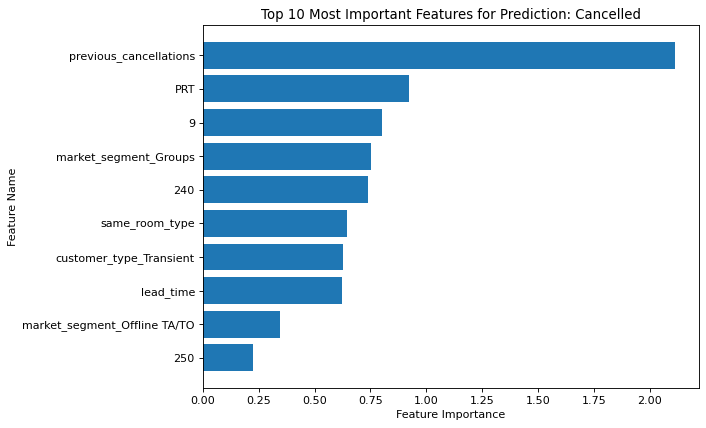

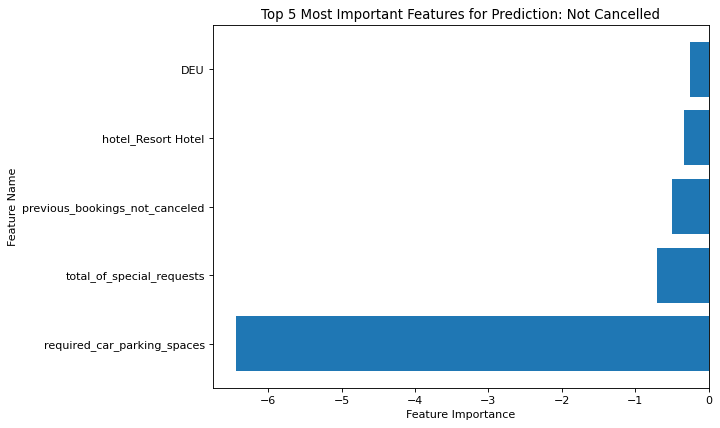

In [61]:
# fit a logistic regression model
lr = LogisticRegression(solver = 'liblinear',C=10)
lr.fit(X_train_preprocessed, y_train)

# calculate feature importances
importance = lr.coef_[0]
indices = np.argsort(importance)

# plot the 10 most important features
plt.figure(figsize=(8, 6))
plt.barh(range(10), importance[indices[-10:]])
plt.yticks(range(10), X.columns[indices[-10:]])
plt.title('Top 10 Most Important Features for Prediction: Cancelled')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')

# plot the 10 least important features
plt.figure(figsize=(8, 6))
plt.barh(range(5), importance[indices[:5]])
plt.yticks(range(5), X.columns[indices[:5]])
plt.title('Top 5 Most Important Features for Prediction: Not Cancelled')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')

plt.show()


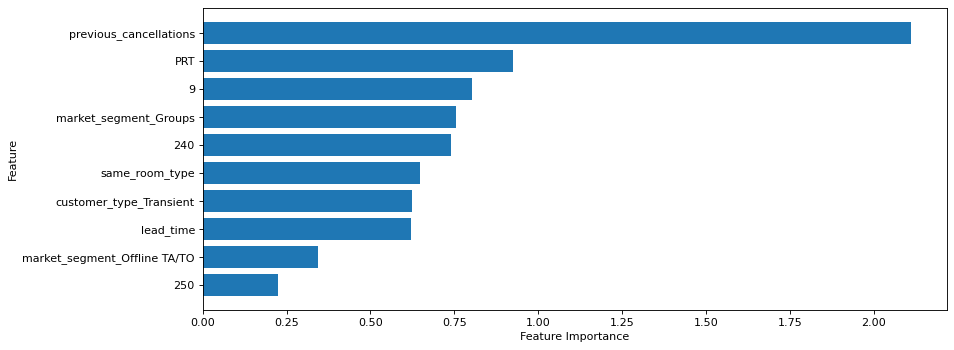

In [62]:
# fit a logistic regression model
lr = LogisticRegression(solver = 'liblinear',C=10)
lr.fit(X_train_preprocessed, y_train)

# calculate feature importances
coef = lr.coef_[0]
importance = coef # np.abs(coef)

# get indices of top 10 features
indices = np.argsort(importance)[-10:]

# plot feature importances
plt.barh(range(len(indices)), importance[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title("Relative feature importance for logistic regression")
plt.show()

In [63]:
# Apply a custom threshold to make predictions
threshold = 0.4 # You can change this value to vary the threshold
y_pred_custom_threshold = (y_pred_proba >= threshold).astype(int)

# Calculate the confusion matrix using the custom threshold predictions
cm = confusion_matrix(y_test, y_pred_custom_threshold)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for NN')
plt.show()

NameError: name 'labels' is not defined

<Figure size 640x480 with 0 Axes>

In [64]:
FN = []
FP = []
for i in np.linspace(0,1,100):
    # Apply a custom threshold to make predictions
    threshold = i # You can change this value to vary the threshold
    y_pred_custom_threshold = (y_pred_proba >= threshold).astype(int)

    # Calculate the confusion matrix using the custom threshold predictions
    cm = confusion_matrix(y_test, y_pred_custom_threshold)
    FN.append(cm[1,0]/cm.sum())
    FP.append(cm[0,1]/cm.sum())

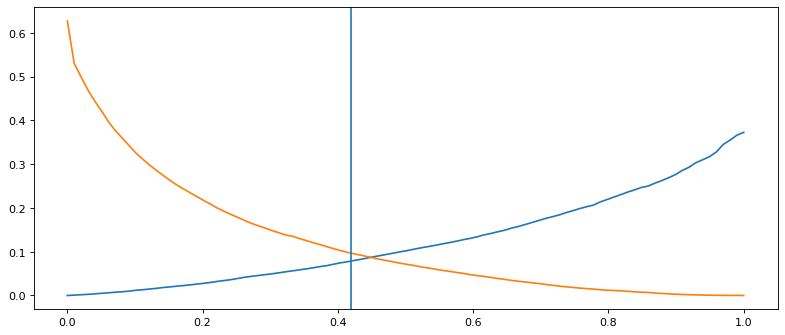

In [65]:
plt.plot(np.linspace(0,1,100), FN)
plt.plot(np.linspace(0,1,100), FP)
plt.axvline(0.42)

0.46


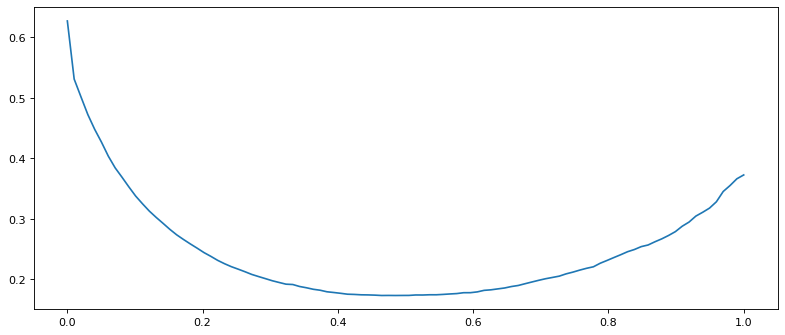

In [66]:
plt.plot(np.linspace(0,1,100), [FN[i]+ FP[i] for i in range(100)])
plt.xlabel = "Threshold value"
plt.ylabel = "Percentage of false positives and false negatives (Wrong classification)"
print(np.array([FN[i]+ FP[i] for i in range(100)]).argmin()/100)

We want to minimize false negatives since this would lead to double bookings which are more expensive for the hotel to fix than a False positive prediction would be. This is because a double booking would lead to customers having no room and that would be bad press for the hotel.   

## 4. Discussion & Conclusions


*In this section you should provide a general overview of **your final model**, its **performance**, and **reliability**.* 

Your report must include the following:

* Some discussion of the features that are most important for predicting a cancelation - we do not need discussion of specific coefficient values but direction of the effect should be clear (e.g. the earlier a booking is made the more likely it is to be canceled).

* A validated assessment of your model's performance, but this must be specifically discussed in the context of bookings and running a hotel. 

* It is not sufficient to report summary statistics like the accuracy or AUC - you must address the perfomance in terms of potential gains and losses for the hotel (e.g. think about what happens if your model predicts a cancelation that does not actually occur and a room ends up being double booked or vice versa). 

* Explain why you think your particular model would or would not be economically viable.

TALK ABOUT EDA + ANY NOVEL FEATURE ENGINEERING
WHAT DID WE DROP etc


## 5. References

*In this section, you should present a list of external sources (except the course materials) that you used during the project, if any*

- Additional data sources can be cited here, in addition to related python documentations, any other webpage sources that you benefited from